In [1]:
# Gerekli Kütüphaneleri çağralım 
import numpy as np
import pandas as pd

## Daha sonram verimizi aktiv hale salalım

In [2]:
df=pd.read_csv('project tasks_data_mito.csv') 

In [3]:
df

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,2,0.0,106.1400,2011
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,2011
2,HU-2011-1220,01-01-2011,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,"Tenex Box, Single Width",66,4,0.0,29.6400,2011
3,IT-2011-3647632,01-01-2011,Eugene Moren,Home Office,Sweden,North,OFF-PA-10001492,Office Supplies,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,2011
4,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,FUR-FU-10003447,Furniture,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,12/31/2014,Erica Bern,Corporate,United States,West,OFF-BI-10002103,Office Supplies,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,2014
51286,MO-2014-2560,12/31/2014,Liz Preis,Consumer,Morocco,Africa,OFF-WIL-10001069,Office Supplies,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,2014
51287,MX-2014-110527,12/31/2014,Charlotte Melton,Consumer,Nicaragua,Central,OFF-LA-10004182,Office Supplies,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,2014
51288,MX-2014-114783,12/31/2014,Tamara Dahlen,Consumer,Mexico,North,OFF-LA-10000413,Office Supplies,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,2014


In [10]:
# Verimizin ilk 10 ve son değerini bakalım bunu pyton fonksiyonlrını kulanarak yapıcağız

def data(df1):
    print('##### ilk 10 gozlem #####')
    print(df1.head(10))
    print('#### son 10 gozlem #####')
    print(df1.tail(10))
    
data(df)

##### ilk 10 gozlem #####
          order_id  order_date     customer_name      segment      country   
0     AG-2011-2040  01-01-2011   Toby Braunhardt     Consumer      Algeria  \
1    IN-2011-47883  01-01-2011       Joseph Holt     Consumer    Australia   
2     HU-2011-1220  01-01-2011     Annie Thurman     Consumer      Hungary   
3  IT-2011-3647632  01-01-2011      Eugene Moren  Home Office       Sweden   
4    IN-2011-47883  01-01-2011       Joseph Holt     Consumer    Australia   
5    IN-2011-47883  01-01-2011       Joseph Holt     Consumer    Australia   
6     CA-2011-1510  01-02-2011   Magdelene Morse     Consumer       Canada   
7    IN-2011-79397  01-03-2011       Kean Nguyen    Corporate    Australia   
8    ID-2011-80230  01-03-2011      Ken Lonsdale     Consumer  New Zealand   
9     IZ-2011-4680  01-03-2011  Lindsay Williams    Corporate         Iraq   

    region        product_id         category   
0   Africa  OFF-TEN-10000025  Office Supplies  \
1  Oceania   OFF-

In [11]:
# colunamelerine bakalim
df.columns

Index(['order_id', 'order_date', 'customer_name', 'segment', 'country',
       'region', 'product_id', 'category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'year'],
      dtype='object')

In [105]:
df.describe()

,quantity,discount,profit,year
count,51281.000000,51281.000000,51281.000000,51281.000000
mean,3.476726,0.142918,28.643667,2012.777286
std,2.278873,0.212292,174.438987,1.098941
min,1.000000,0.000000,-6599.978000,2011.000000
25%,2.000000,0.000000,0.000000,2012.000000
50%,3.000000,0.000000,9.240000,2013.000000
75%,5.000000,0.200000,36.810000,2014.000000
max,14.000000,0.850000,8399.976000,2014.000000


In [13]:
# verimiz`de eksik bir deyer varmi ona bakalim
df.isnull().values.any()

False

<AxesSubplot:>

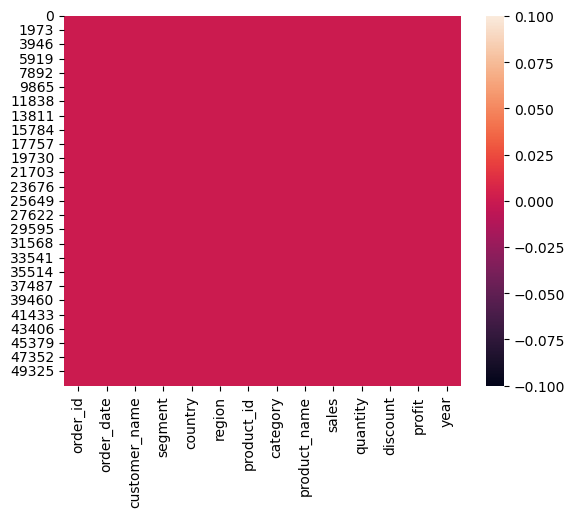

In [14]:
# eksik deyerin var olub olmadiginiz seaborn kutuphanesi kulanarak grafik olarak bakalim
import seaborn as sns
sns.heatmap(df.isnull())

In [16]:
# verimizde tekrar eden her hangi bir deyer olub-olmadigina bakalim
df.duplicated().sum()

9

In [17]:
# tekrar eden deyerleri 0 layalim
df=df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

In [19]:
# verimizin daha yakindan tanimak icin bilgilerine bakalim
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51281 entries, 0 to 51289
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       51281 non-null  object 
 1   order_date     51281 non-null  object 
 2   customer_name  51281 non-null  object 
 3   segment        51281 non-null  object 
 4   country        51281 non-null  object 
 5   region         51281 non-null  object 
 6   product_id     51281 non-null  object 
 7   category       51281 non-null  object 
 8   product_name   51281 non-null  object 
 9   sales          51281 non-null  object 
 10  quantity       51281 non-null  int64  
 11  discount       51281 non-null  float64
 12  profit         51281 non-null  float64
 13  year           51281 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 5.9+ MB


In [20]:
# verimiz de object olan deyerleri ve int64-float64 olan deyerleri ayri-ayri alalim
df.select_dtypes(include=['object'])

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120
2,HU-2011-1220,01-01-2011,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,"Tenex Box, Single Width",66
3,IT-2011-3647632,01-01-2011,Eugene Moren,Home Office,Sweden,North,OFF-PA-10001492,Office Supplies,"Enermax Note Cards, Premium",45
4,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,FUR-FU-10003447,Furniture,"Eldon Light Bulb, Duo Pack",114
...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,12/31/2014,Erica Bern,Corporate,United States,West,OFF-BI-10002103,Office Supplies,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14
51286,MO-2014-2560,12/31/2014,Liz Preis,Consumer,Morocco,Africa,OFF-WIL-10001069,Office Supplies,"Wilson Jones Hole Reinforcements, Clear",4
51287,MX-2014-110527,12/31/2014,Charlotte Melton,Consumer,Nicaragua,Central,OFF-LA-10004182,Office Supplies,"Hon Color Coded Labels, 5000 Label Set",26
51288,MX-2014-114783,12/31/2014,Tamara Dahlen,Consumer,Mexico,North,OFF-LA-10000413,Office Supplies,"Hon Legal Exhibit Labels, Alphabetical",7


In [21]:
# indi ise intager(int64) ve float64 deyerlerinin alalim
df.select_dtypes(include=['float64','int64'])

,quantity,discount,profit,year
0,2,0.0,106.1400,2011
1,3,0.1,36.0360,2011
2,4,0.0,29.6400,2011
3,3,0.5,-26.0550,2011
4,5,0.1,37.7700,2011
...,...,...,...,...
51285,2,0.2,4.5188,2014
51286,1,0.0,0.4200,2014
51287,3,0.0,12.3600,2014
51288,1,0.0,0.5600,2014


In [23]:
df.head(2)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,2,0.0,106.140,2011
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,2011


In [26]:
df.segment.value_counts()

segment
Consumer       26514
Corporate      15428
Home Office     9339
Name: count, dtype: int64

In [31]:
df['segment'].isin(['Corporate']).count()

51281

In [32]:
df.head(20)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,2,0.00,106.1400,2011
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,3,0.10,36.0360,2011
2,HU-2011-1220,01-01-2011,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,"Tenex Box, Single Width",66,4,0.00,29.6400,2011
3,IT-2011-3647632,01-01-2011,Eugene Moren,Home Office,Sweden,North,OFF-PA-10001492,Office Supplies,"Enermax Note Cards, Premium",45,3,0.50,-26.0550,2011
4,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,FUR-FU-10003447,Furniture,"Eldon Light Bulb, Duo Pack",114,5,0.10,37.7700,2011
5,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-PA-10001968,Office Supplies,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.10,15.3420,2011
6,CA-2011-1510,01-02-2011,Magdelene Morse,Consumer,Canada,Canada,TEC-OKI-10002750,Technology,"Okidata Inkjet, Wireless",314,1,0.00,3.1200,2011
7,IN-2011-79397,01-03-2011,Kean Nguyen,Corporate,Australia,Oceania,OFF-AP-10000304,Office Supplies,"Hoover Microwave, White",276,1,0.10,110.4120,2011
8,ID-2011-80230,01-03-2011,Ken Lonsdale,Consumer,New Zealand,Oceania,TEC-CO-10004182,Technology,"Hewlett Wireless Fax, Laser",912,4,0.40,-319.4640,2011
9,IZ-2011-4680,01-03-2011,Lindsay Williams,Corporate,Iraq,EMEA,FUR-NOV-10002791,Furniture,"Novimex Swivel Stool, Set of Two",667,4,0.00,253.3200,2011


In [35]:
df.country.value_counts()

country
United States    9993
Australia        2835
France           2827
Mexico           2644
Germany          2065
                 ... 
Burundi             2
Chad                2
Eritrea             2
Bahrain             2
South Sudan         2
Name: count, Length: 147, dtype: int64

In [36]:
df[(df['country']=='United States') & (df['segment']=='Consumer')]

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
38,CA-2011-103800,01-04-2011,Darren Powers,Consumer,United States,Central,OFF-PA-10000174,Office Supplies,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16,2,0.2,5.5512,2011
57,CA-2011-141817,01-06-2011,Mick Brown,Consumer,United States,East,OFF-AR-10003478,Office Supplies,Avery Hi-Liter EverBold Pen Style Fluorescent ...,20,3,0.2,4.8840,2011
71,CA-2011-130813,01-07-2011,Lycoris Saunders,Consumer,United States,West,OFF-PA-10002005,Office Supplies,Xerox 225,19,3,0.0,9.3312,2011
87,CA-2011-105417,01-08-2011,Vivek Sundaresam,Consumer,United States,Central,FUR-FU-10004864,Furniture,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",77,3,0.6,-53.7096,2011
91,CA-2011-105417,01-08-2011,Vivek Sundaresam,Consumer,United States,Central,OFF-BI-10003708,Office Supplies,Acco Four Pocket Poly Ring Binder with Label H...,10,7,0.8,-18.2525,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51227,US-2014-158526,12/30/2014,Katherine Hughes,Consumer,United States,South,OFF-BI-10002414,Office Supplies,GBC ProClick Spines for 32-Hole Punch,13,1,0.0,5.8891,2014
51240,CA-2014-143259,12/31/2014,Patrick O'Donnell,Consumer,United States,East,FUR-BO-10003441,Furniture,"Bush Westfield Collection Bookcases, Fully Ass...",323,4,0.2,12.1176,2014
51256,CA-2014-143259,12/31/2014,Patrick O'Donnell,Consumer,United States,East,TEC-PH-10004774,Technology,Gear Head AU3700S Headset,91,7,0.0,2.7279,2014
51260,CA-2014-143259,12/31/2014,Patrick O'Donnell,Consumer,United States,East,OFF-BI-10003684,Office Supplies,Wilson Jones Legal Size Ring Binders,53,3,0.2,19.7910,2014


In [44]:
df[(df['country']=='United States') & (df['segment']=='Consumer') & (df['region']=='Central')]

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
38,CA-2011-103800,01-04-2011,Darren Powers,Consumer,United States,Central,OFF-PA-10000174,Office Supplies,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16,2,0.20,5.5512,2011
87,CA-2011-105417,01-08-2011,Vivek Sundaresam,Consumer,United States,Central,FUR-FU-10004864,Furniture,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",77,3,0.60,-53.7096,2011
91,CA-2011-105417,01-08-2011,Vivek Sundaresam,Consumer,United States,Central,OFF-BI-10003708,Office Supplies,Acco Four Pocket Poly Ring Binder with Label H...,10,7,0.80,-18.2525,2011
121,CA-2011-135405,01-10-2011,Melanie Seite,Consumer,United States,Central,TEC-AC-10001266,Technology,Memorex Micro Travel Drive 8 GB,31,3,0.20,9.7500,2011
124,CA-2011-135405,01-10-2011,Melanie Seite,Consumer,United States,Central,OFF-AR-10004078,Office Supplies,Newell 312,9,2,0.20,1.1680,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50938,CA-2014-134194,12/26/2014,Guy Armstrong,Consumer,United States,Central,OFF-AR-10001615,Office Supplies,Newell 34,32,2,0.20,2.3808,2014
50963,CA-2014-134194,12/26/2014,Guy Armstrong,Consumer,United States,Central,OFF-BI-10001116,Office Supplies,"Wilson Jones 1"" Hanging DublLock Ring Binders",3,3,0.80,-5.0688,2014
50999,US-2014-106705,12/27/2014,Patrick O'Brill,Consumer,United States,Central,OFF-PA-10001509,Office Supplies,"Recycled Desk Saver Line ""While You Were Out"" ...",45,5,0.00,20.5850,2014
51129,CA-2014-136539,12/29/2014,Greg Hansen,Consumer,United States,Central,FUR-BO-10004709,Furniture,"Bush Westfield Collection Bookcases, Medium Ch...",79,2,0.32,-11.5960,2014


In [41]:
df[df['sales'] == '195']

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
15,MX-2011-160234,01-03-2011,Stewart Visinsky,Consumer,Guatemala,Central,TEC-PH-10002647,Technology,"Nokia Headset, VoIP",195,4,0.00,44.880,2011
823,ES-2011-1705541,03-01-2011,Todd Sumrall,Corporate,United Kingdom,North,OFF-AR-10004151,Office Supplies,"BIC Sketch Pad, Blue",195,4,0.00,34.920,2011
1018,ES-2011-2933675,03-12-2011,Sheri Gordon,Consumer,Finland,North,OFF-AR-10003457,Office Supplies,"Sanford Sketch Pad, Water Color",195,4,0.00,91.440,2011
1685,MX-2011-140340,4/19/2011,Bobby Elias,Consumer,Cuba,Caribbean,TEC-PH-10000100,Technology,"Motorola Office Telephone, Full Size",195,4,0.00,60.320,2011
1754,IN-2011-12806,4/22/2011,Brendan Sweed,Corporate,China,North Asia,OFF-SU-10001308,Office Supplies,"Fiskars Trimmer, Serrated",195,5,0.00,33.150,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45312,TU-2014-5440,9/30/2014,Shaun Chance,Corporate,Turkey,EMEA,FUR-DAN-10004625,Furniture,"Dania Stackable Bookrack, Mobile",195,4,0.60,-77.856,2014
45857,ID-2014-24538,10-10-2014,Pamela Coakley,Corporate,Philippines,Southeast Asia,FUR-BO-10002738,Furniture,"Sauder Corner Shelving, Mobile",195,2,0.35,-95.934,2014
49265,ES-2014-3503285,12-02-2014,Barry Gonzalez,Consumer,Germany,Central,OFF-SU-10002342,Office Supplies,"Kleencut Scissors, Steel",195,9,0.00,11.610,2014
49816,RS-2014-4660,12-10-2014,Steven Roelle,Home Office,Russia,EMEA,FUR-ELD-10000857,Furniture,"Eldon Door Stop, Erganomic",195,4,0.00,25.320,2014


In [51]:
df[(df['country']=='United States') & (df['year'] == 2011)].count()

order_id         1992
order_date       1992
customer_name    1992
segment          1992
country          1992
region           1992
product_id       1992
category         1992
product_name     1992
sales            1992
quantity         1992
discount         1992
profit           1992
year             1992
dtype: int64

In [53]:
df.sort_values('sales', ascending=False)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
8823,CA-2011-143371,12/28/2011,Maribeth Dona,Consumer,United States,West,OFF-ST-10001128,Office Supplies,"Carina Mini System Audio Rack, Model AR050B",999,9,0.00,29.9646,2011
7602,CA-2011-121629,11/28/2011,Brian Thompson,Consumer,United States,Central,TEC-MA-10004679,Technology,StarTech.com 10/100 VDSL2 Ethernet Extender Kit,999,5,0.40,-199.7700,2011
14710,CA-2012-146563,8/24/2012,Cassandra Brandow,Consumer,United States,Central,OFF-ST-10001490,Office Supplies,"Hot File 7-Pocket, Floor Stand",999,7,0.20,124.9290,2012
5676,ES-2011-5251246,9/27/2011,Filia McAdams,Corporate,France,Central,TEC-CO-10001633,Technology,"Sharp Fax Machine, High-Speed",999,4,0.15,70.4100,2011
40454,MX-2014-165260,6/28/2014,Bruce Stewart,Consumer,Guatemala,Central,OFF-AP-10002425,Office Supplies,"Hamilton Beach Refrigerator, Black",999,3,0.00,179.8200,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38545,CA-2014-164042,5/24/2014,Ken Lonsdale,Consumer,United States,Central,OFF-BI-10001922,Office Supplies,Storex Dura Pro Binders,1,1,0.80,-1.9602,2014
47449,CA-2014-106691,11-07-2014,Christopher Conant,Consumer,United States,Central,OFF-BI-10000145,Office Supplies,Zipper Ring Binder Pockets,1,2,0.80,-1.9344,2014
21828,CA-2013-163153,3/22/2013,Dario Medina,Corporate,United States,Central,OFF-AR-10001868,Office Supplies,Prang Dustless Chalk Sticks,1,1,0.20,0.5040,2013
13074,CA-2012-119690,6/25/2012,Mark Van Huff,Consumer,United States,Central,OFF-BI-10000201,Office Supplies,"Avery Triangle Shaped Sheet Lifters, Black, 2/...",1,2,0.80,-1.4760,2012


In [58]:
df[df['country']=='United States'].sort_values('sales', ascending=False)

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
7602,CA-2011-121629,11/28/2011,Brian Thompson,Consumer,United States,Central,TEC-MA-10004679,Technology,StarTech.com 10/100 VDSL2 Ethernet Extender Kit,999,5,0.4,-199.7700,2011
8823,CA-2011-143371,12/28/2011,Maribeth Dona,Consumer,United States,West,OFF-ST-10001128,Office Supplies,"Carina Mini System Audio Rack, Model AR050B",999,9,0.0,29.9646,2011
14710,CA-2012-146563,8/24/2012,Cassandra Brandow,Consumer,United States,Central,OFF-ST-10001490,Office Supplies,"Hot File 7-Pocket, Floor Stand",999,7,0.2,124.9290,2012
2634,CA-2011-159520,06-06-2011,Grant Thornton,Corporate,United States,East,FUR-TA-10003238,Furniture,"Chromcraft Bull-Nose Wood 48"" x 96"" Rectangula...",992,3,0.4,-347.1174,2011
15543,CA-2012-140984,9/14/2012,Craig Carroll,Consumer,United States,East,OFF-ST-10000585,Office Supplies,Economy Rollaway Files,991,6,0.0,257.7120,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31639,US-2013-110156,11/20/2013,Eric Hoffmann,Consumer,United States,Central,OFF-BI-10002609,Office Supplies,Avery Hidden Tab Dividers for Binding Systems,1,2,0.8,-2.0264,2013
21828,CA-2013-163153,3/22/2013,Dario Medina,Corporate,United States,Central,OFF-AR-10001868,Office Supplies,Prang Dustless Chalk Sticks,1,1,0.2,0.5040,2013
14076,CA-2012-112214,08-05-2012,Anna Häberlin,Corporate,United States,Central,OFF-BI-10002982,Office Supplies,Avery Self-Adhesive Photo Pockets for Polaroid...,1,1,0.8,-2.1792,2012
51147,US-2014-162068,12/29/2014,Pamela Coakley,Corporate,United States,West,OFF-BI-10002813,Office Supplies,Avery Reinforcements for Hole-Punch Pages,1,2,0.7,-0.9900,2014


In [75]:
df.loc[(df['country']=='Russia') & (df['category']=='Technology')]['category'].count()

76

In [76]:
df.loc[(df['country']=='Russia') & (df['category']!='Technology')]['category'].count()

308

In [82]:
df[(df['country']=='Russia')]['category'].count()

384

In [85]:
df.groupby('country').agg({'category':'count'})

,category
country,
Afghanistan,55
Albania,16
Algeria,195
Angola,122
Argentina,390
...,...
Venezuela,194
Vietnam,265
Yemen,30


In [88]:
df.groupby(['country','category']).agg({'sales':'count'})

sales
country     category              
Afghanistan Furniture           13
            Office Supplies     30
            Technology          12
Albania     Furniture            3
            Office Supplies      9
...                            ...
Zambia      Office Supplies     62
            Technology          19
Zimbabwe    Furniture            7
            Office Supplies     64
            Technology           9

[418 rows x 1 columns]

In [94]:
df[(df['customer_name']=='Brian Thompson')]

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
1069,ID-2011-20975,3/16/2011,Brian Thompson,Consumer,Australia,Oceania,FUR-FU-10004730,Furniture,"Rubbermaid Light Bulb, Erganomic",47,3,0.10,-3.7080,2011
6144,MX-2011-151358,10/13/2011,Brian Thompson,Consumer,Chile,South,FUR-BO-10002981,Furniture,"Sauder Stackable Bookrack, Traditional",98,1,0.00,0.9600,2011
7602,CA-2011-121629,11/28/2011,Brian Thompson,Consumer,United States,Central,TEC-MA-10004679,Technology,StarTech.com 10/100 VDSL2 Ethernet Extender Kit,999,5,0.40,-199.7700,2011
7904,ES-2011-4479011,12-06-2011,Brian Thompson,Consumer,Italy,South,OFF-BI-10000880,Office Supplies,"Wilson Jones Binder, Recycled",120,9,0.00,45.6300,2011
7905,ES-2011-4479011,12-06-2011,Brian Thompson,Consumer,Italy,South,OFF-FA-10004824,Office Supplies,"Stockwell Rubber Bands, Bulk Pack",113,7,0.00,19.1100,2011
8560,EG-2011-1640,12/22/2011,Brian Thompson,Consumer,Egypt,Africa,TEC-PAN-10000391,Technology,"Panasonic Printer, Red",264,1,0.00,39.5400,2011
8561,EG-2011-1640,12/22/2011,Brian Thompson,Consumer,Egypt,Africa,TEC-CIS-10001767,Technology,"Cisco Office Telephone, Cordless",167,2,0.00,34.9800,2011
8590,EG-2011-1640,12/22/2011,Brian Thompson,Consumer,Egypt,Africa,OFF-AVE-10004827,Office Supplies,"Avery Binder Covers, Recycled",11,1,0.00,4.1100,2011
9988,ES-2012-2332844,03-02-2012,Brian Thompson,Consumer,United Kingdom,North,FUR-BO-10001892,Furniture,"Sauder Library with Doors, Pine",583,3,0.50,-490.1400,2012
9990,ES-2012-2332844,03-02-2012,Brian Thompson,Consumer,United Kingdom,North,OFF-ST-10003995,Office Supplies,"Eldon File Cart, Single Width",448,7,0.50,-286.6500,2012


In [96]:
df[(df['customer_name']=='Brian Thompson') & (df['category']=='Technology')].count()

order_id         11
order_date       11
customer_name    11
segment          11
country          11
region           11
product_id       11
category         11
product_name     11
sales            11
quantity         11
discount         11
profit           11
year             11
dtype: int64

In [101]:
df[df['country']=='Italy']

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
144,ES-2011-1138719,01-11-2011,Eric Murdock,Consumer,Italy,South,OFF-BI-10001833,Office Supplies,"Ibico Hole Reinforcements, Recycled",22,3,0.0,6.750,2011
231,ES-2011-3666932,1/19/2011,Matt Abelman,Home Office,Italy,South,OFF-BI-10004195,Office Supplies,"Wilson Jones Binding Machine, Clear",145,3,0.0,43.560,2011
235,ES-2011-3666932,1/19/2011,Matt Abelman,Home Office,Italy,South,OFF-ST-10000988,Office Supplies,"Fellowes Folders, Blue",48,3,0.4,7.920,2011
239,ES-2011-1690587,1/19/2011,Ann Blume,Corporate,Italy,South,OFF-EN-10004150,Office Supplies,"GlobeWeis Business Envelopes, Recycled",48,3,0.0,21.240,2011
287,ES-2011-5497239,1/22/2011,Paul Stevenson,Home Office,Italy,South,OFF-ST-10003102,Office Supplies,"Rogers Lockers, Single Width",889,7,0.4,59.220,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50740,ES-2014-5319388,12/24/2014,Valerie Takahito,Home Office,Italy,South,OFF-LA-10001154,Office Supplies,"Hon Shipping Labels, Adjustable",74,8,0.0,25.920,2014
50766,ES-2014-5319388,12/24/2014,Valerie Takahito,Home Office,Italy,South,OFF-AR-10002113,Office Supplies,"Boston Highlighters, Easy-Erase",19,1,0.0,4.200,2014
50939,IT-2014-4907444,12/26/2014,Barry Pond,Corporate,Italy,South,FUR-CH-10000214,Furniture,"Harbour Creations Bag Chairs, Black",24,1,0.6,-30.204,2014
51001,ES-2014-4917515,12/27/2014,Robert Marley,Home Office,Italy,South,OFF-SU-10003357,Office Supplies,"Fiskars Shears, Steel",94,2,0.0,27.240,2014


In [104]:
df[df['country']=='Italy']['category'].value_counts()

category
Office Supplies    746
Technology         207
Furniture          155
Name: count, dtype: int64

In [107]:
df[df['segment']=='Consumer']

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
0,AG-2011-2040,01-01-2011,Toby Braunhardt,Consumer,Algeria,Africa,OFF-TEN-10000025,Office Supplies,"Tenex Lockers, Blue",408,2,0.0,106.1400,2011
1,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-SU-10000618,Office Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,2011
2,HU-2011-1220,01-01-2011,Annie Thurman,Consumer,Hungary,EMEA,OFF-TEN-10001585,Office Supplies,"Tenex Box, Single Width",66,4,0.0,29.6400,2011
4,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,FUR-FU-10003447,Furniture,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,2011
5,IN-2011-47883,01-01-2011,Joseph Holt,Consumer,Australia,Oceania,OFF-PA-10001968,Office Supplies,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.1,15.3420,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51282,UP-2014-4410,12/31/2014,Guy Thornton,Consumer,Ukraine,EMEA,OFF-AVE-10003558,Office Supplies,"Avery Round Labels, Alphabetical",28,4,0.0,6.1200,2014
51286,MO-2014-2560,12/31/2014,Liz Preis,Consumer,Morocco,Africa,OFF-WIL-10001069,Office Supplies,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,2014
51287,MX-2014-110527,12/31/2014,Charlotte Melton,Consumer,Nicaragua,Central,OFF-LA-10004182,Office Supplies,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,2014
51288,MX-2014-114783,12/31/2014,Tamara Dahlen,Consumer,Mexico,North,OFF-LA-10000413,Office Supplies,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,2014


In [108]:
df['segment'].value_counts()

segment
Consumer       26514
Corporate      15428
Home Office     9339
Name: count, dtype: int64

In [116]:
df[df['country']=='Turkey']

,order_id,order_date,customer_name,segment,country,region,product_id,category,product_name,sales,quantity,discount,profit,year
136,TU-2011-800,01-11-2011,Chuck Sachs,Consumer,Turkey,EMEA,FUR-SAF-10003540,Furniture,"Safco Floating Shelf Set, Metal",157,2,0.6,-117.720,2011
186,TU-2011-4040,1/14/2011,Bruce Degenhardt,Consumer,Turkey,EMEA,OFF-FEL-10001261,Office Supplies,"Fellowes File Cart, Blue",110,2,0.6,-54.972,2011
190,TU-2011-4040,1/14/2011,Bruce Degenhardt,Consumer,Turkey,EMEA,OFF-SME-10004553,Office Supplies,"Smead Lockers, Blue",79,1,0.6,-85.332,2011
191,TU-2011-4040,1/14/2011,Bruce Degenhardt,Consumer,Turkey,EMEA,OFF-ACM-10003278,Office Supplies,"Acme Trimmer, Easy Grip",74,4,0.6,-70.320,2011
197,TU-2011-4040,1/14/2011,Bruce Degenhardt,Consumer,Turkey,EMEA,OFF-STA-10000298,Office Supplies,"Stanley Canvas, Blue",79,4,0.6,-87.168,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51170,TU-2014-1230,12/30/2014,Janet Lee,Consumer,Turkey,EMEA,TEC-NOK-10001678,Technology,"Nokia Audio Dock, Cordless",136,2,0.6,-135.708,2014
51211,TU-2014-7130,12/30/2014,Mitch Gastineau,Corporate,Turkey,EMEA,OFF-FEL-10004665,Office Supplies,"Fellowes Lockers, Blue",166,2,0.6,-141.036,2014
51220,TU-2014-3480,12/30/2014,Fred McMath,Consumer,Turkey,EMEA,OFF-BIN-10002061,Office Supplies,"Binney & Smith Sketch Pad, Blue",19,1,0.6,-15.762,2014
51249,TU-2014-5170,12/31/2014,Valerie Dominguez,Consumer,Turkey,EMEA,FUR-TEN-10000558,Furniture,"Tenex Frame, Erganomic",174,4,0.6,-117.360,2014
